In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker

In [49]:
def read_csv_with_separators(file_path, separators):
    for sep in separators:
        df = pd.read_csv(file_path, sep=sep)
        if len(df.columns) > 1:
            return df
    raise ValueError(f"Could not read the file {file_path} with the provided separators.")

In [50]:
import pandas as pd

file1 = 'P:/LAB/Manuel/2023/2023-04/Microscopy/20230419_Morpho_ONC-2/20230419_Morpho.csv' 
file2 = 'P:/LAB/Manuel/2023/2023-04/Microscopy/20230418_Morpho_ONC-1/20230418_Morpho.csv'
file3 = 'P:/LAB/Manuel/2023/2023-04/Microscopy/20230420_Morpho_ONC-3/20230420_Morpho.csv'

separators = [',', '\t']

df1 = read_csv_with_separators(file1, separators)
df2 = read_csv_with_separators(file2, separators)
df3 = read_csv_with_separators(file3, separators)

# Strip extra spaces from column names
df1.columns = df1.columns.str.strip()
df2.columns = df2.columns.str.strip()
df3.columns = df3.columns.str.strip()

In [51]:
# Step 3: Concatenate the data from the files
df = pd.concat([df1, df2, df3])

In [52]:
print(df.tail())
print(df.columns)

      NAME  ASSOCIATION    EXPERIMENT    IMAGE  INTENSITY  POSITION  \
3438  b753            0  Experiment 9  EM12440  6856.5537         6   
3439  b770            0  Experiment 9  EM12440  6665.5947         6   
3440  b772            0  Experiment 9  EM12440  6701.7690         6   
3441  b776            0  Experiment 9  EM12440  6882.7393         6   
3442  b777            0  Experiment 9  EM12440  7073.9287         6   

      SHAPE.angularity.mean  SHAPE.area  SHAPE.circularity  Curvature  
3438               0.021414    4.188513           0.398159   0.051358  
3439               0.014800    1.806525           0.718754   0.011523  
3440               0.034992    2.135888           0.713017   0.032011  
3441               0.047982    2.881484           0.539307   0.050197  
3442               0.064939    2.693497           0.459060   0.092566  
Index(['NAME', 'ASSOCIATION', 'EXPERIMENT', 'IMAGE', 'INTENSITY', 'POSITION',
       'SHAPE.angularity.mean', 'SHAPE.area', 'SHAPE.circularit

In [53]:
mean_values = df.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()

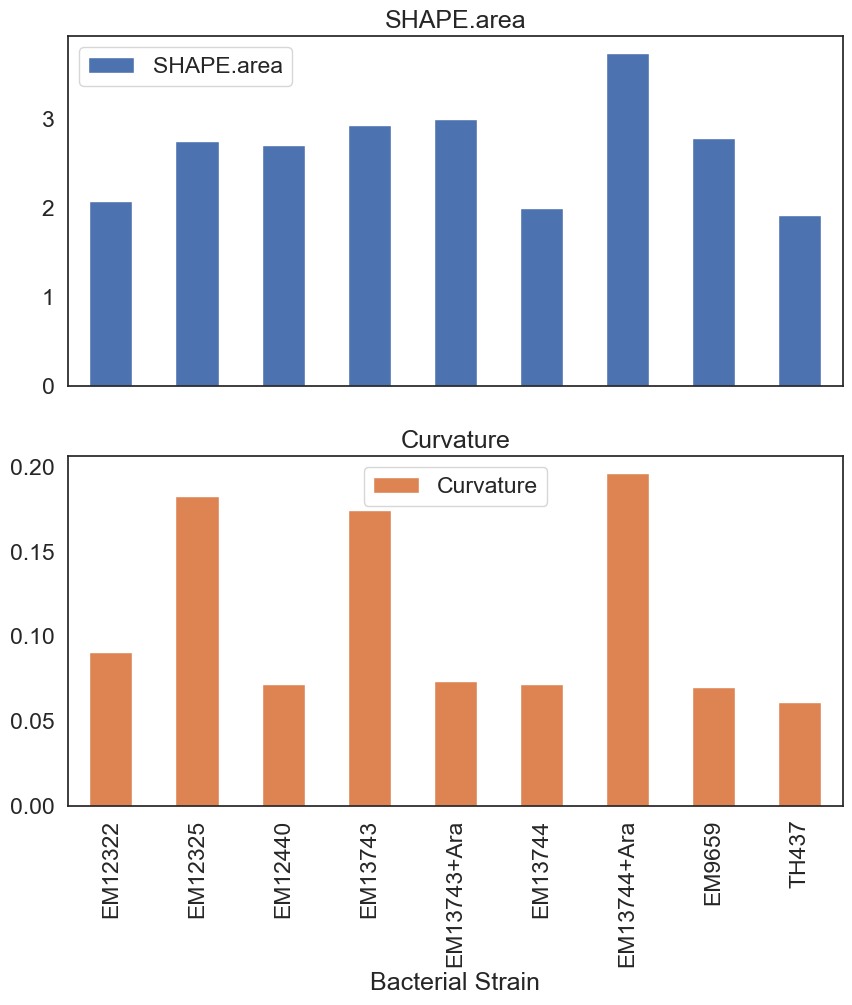

In [54]:
mean_values.plot(kind='bar', subplots=True, figsize=(10, 10))
plt.xlabel('Bacterial Strain')
plt.show()

C:\Users\halteman\AppData\Local\Temp\ipykernel_4232\2419279204.py:37: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.swarmplot(x='IMAGE', y='Curvature', data=mean_data, hue='File', dodge=False,


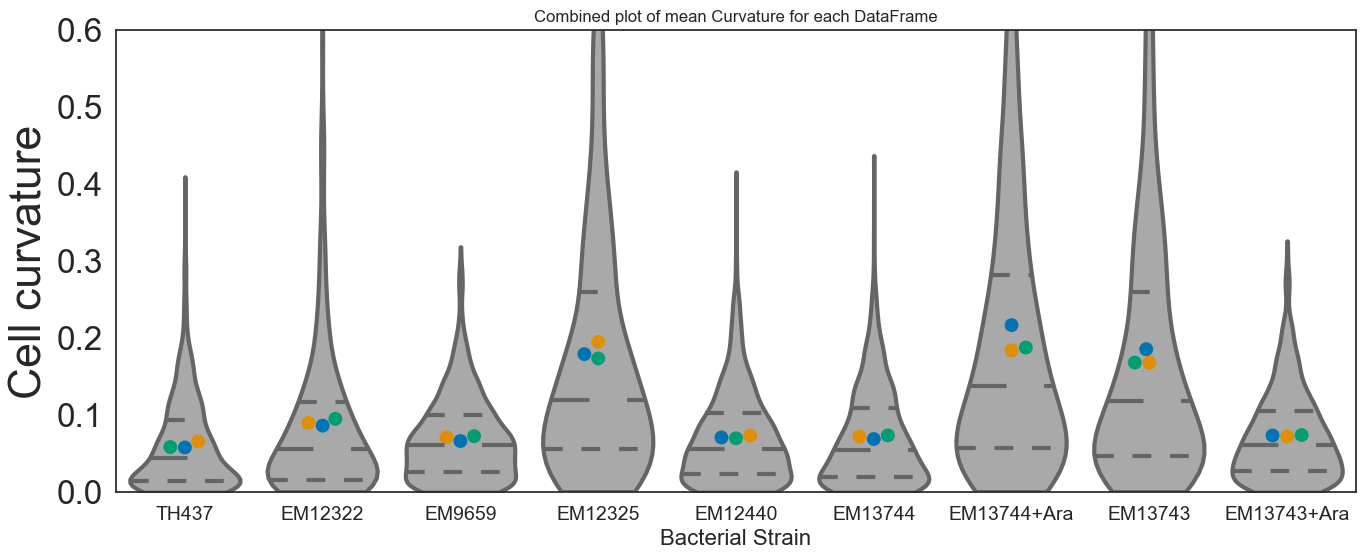

In [55]:
# Define the custom order of strains
custom_order = ['TH437', 'EM12322', 'EM9659', 'EM12325','EM12440','EM13744','EM13744+Ara', 'EM13743', 'EM13743+Ara']  # Add other strains if necessary + exclude EM13743

# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file2 = df2.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file3 = df3.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()

# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Add file labels to the original DataFrames
df1['File'] = 'File 1'
df2['File'] = 'File 2'
df3['File'] = 'File 3'
all_data = pd.concat([df1, df2, df3])

# Create a single figure
# set font size of axis labels
sns.set(font_scale=1.5)
sns.set(style= "white" )
plt.figure(figsize=(16, 6))

# set font size of tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=24)


# 1. Swarm plot showing the mean of each DataFrame
sns.swarmplot(x='IMAGE', y='Curvature', data=mean_data, hue='File', dodge=False, 
              zorder=2, order=custom_order, size = 10, palette=sns.color_palette("colorblind"))

# 2. Violin plot for the individual data points of both DataFrames
sns.violinplot(x='IMAGE', y='Curvature', data=all_data, split=True, inner = 'quartile', 
               linewidth=3, color='darkgray',scale='width', cut=False, width=0.8, order=custom_order)

plt.title('Combined plot of mean Curvature for each DataFrame')
plt.xlabel('Bacterial Strain', fontsize=16)
plt.ylabel('Cell curvature', fontsize=32)

# Set the x-axis tick labels
#plt.xticks(bar_positions, custom_order)

# Set the y-axis range
plt.ylim(0, 0.6)
plt.legend().remove()

# Display the plot
#plt.savefig('violin-2.tiff',dpi=300)
plt.show()

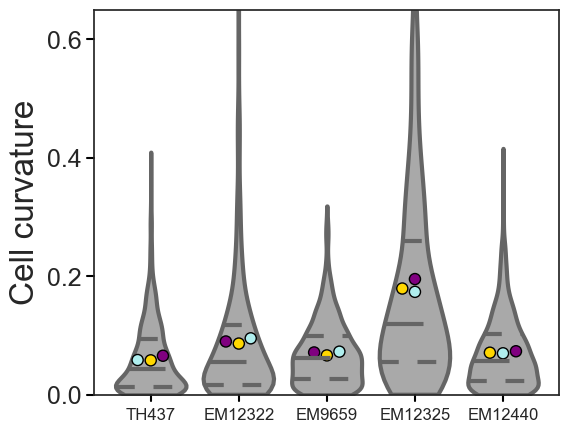

In [56]:
# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file2 = df2.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file3 = df3.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()

# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Add file labels to the original DataFrames
df1['File'] = 'File 1'
df2['File'] = 'File 2'
df3['File'] = 'File 3'
all_data = pd.concat([df1, df2, df3])

# Custom colors for mean data
custom_colors = {'File 1': '#ffd700', 'File 2': '#800080', 'File 3': '#afeeee'}
# Define the strains you want to include
included_strains = ['TH437','EM12322', 'EM9659', 'EM12325', 'EM12440']
custom_order=['TH437','EM12322', 'EM9659', 'EM12325', 'EM12440']

# set font size of axis labels
sns.set(style="white", font_scale=1.5)
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))


# Plot only the data for the included strains
sns.swarmplot(x='IMAGE', y='Curvature', data=mean_data[mean_data['IMAGE'].isin(included_strains)], hue='File', 
              dodge=False, zorder=2, size=8, palette=custom_colors, 
              edgecolor='black', linewidth=1, order=custom_order)

# 2. Violin plot for the individual data points of both DataFrames
sns.violinplot(x='IMAGE', y='Curvature', data=all_data[all_data['IMAGE'].isin(included_strains)], split=True, 
               inner = 'quartile', linewidth=3, color='darkgray',scale='width', 
               cut=False, width=0.8,order=custom_order)

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=16)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())


plt.title('')
plt.xlabel('', fontsize=12)
plt.ylabel('Cell curvature', fontsize=24)
# set font size of tick labels
plt.xticks(fontsize=12)
plt.yticks(y_ticks,fontsize=18)

# Set the y-axis range
plt.ylim(0, 0.65)
plt.legend().remove()

# Display the plot
#plt.savefig('violin_WT_DflhE.tiff',dpi=300,bbox_inches='tight')
plt.show()

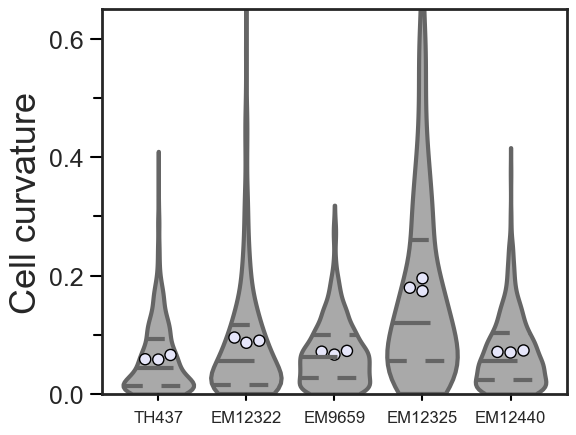

In [78]:
# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file2 = df2.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file3 = df3.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()

# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Add file labels to the original DataFrames
df1['File'] = 'File 1'
df2['File'] = 'File 2'
df3['File'] = 'File 3'
all_data = pd.concat([df1, df2, df3])

# Custom colors for mean data
custom_colors = {'File 1': '#e6e6fa', 'File 2': '#e6e6fa', 'File 3': '#e6e6fa'}
# Define the strains you want to include
included_strains = ['TH437','EM12322', 'EM9659', 'EM12325', 'EM12440']
custom_order=['TH437','EM12322', 'EM9659', 'EM12325', 'EM12440']

# set font size of axis labels
sns.set(style="white", font_scale=1.5)
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))


# Plot only the data for the included strains
sns.swarmplot(x='IMAGE', y='Curvature', data=mean_data[mean_data['IMAGE'].isin(included_strains)], hue='File', 
              dodge=False, zorder=2, size=8, palette=custom_colors, 
              edgecolor='black', linewidth=1, order=custom_order)

# 2. Violin plot for the individual data points of both DataFrames
sns.violinplot(x='IMAGE', y='Curvature', data=all_data[all_data['IMAGE'].isin(included_strains)], split=True, 
               inner = 'quartile', linewidth=3, color='darkgray',scale='width', 
               cut=False, width=0.8,order=custom_order)

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=16)

# Add minor ticks on y-axis without labels
ax.yaxis.set_minor_locator(mticker.MultipleLocator(.1))

# Manually add major y-tick lines
tick_length_major = 0.0225  # Adjust as needed
major_tick_width = 2  # Adjust for desired major tick line width
for y_tick in y_ticks:
    ax.plot([-tick_length_major, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add minor y-tick lines
tick_length_minor = 0.0175  # Adjust as needed, typically smaller than major ticks
minor_y_ticks = np.arange(0, 0.65, 0.1)  # Assuming your y-axis ranges from 0 to 0.65
minor_tick_width = 2000  # Adjust for desired major tick line width
for y_tick_minor in minor_y_ticks:
    if y_tick_minor not in y_ticks:  # This check ensures that we don't overlap with major ticks
        ax.plot([-tick_length_minor, 0], [y_tick_minor, y_tick_minor], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())


# Adjust tick lengths and widths for both minor and major ticks
ax.tick_params(axis='y', which='minor', length=5)
ax.tick_params(axis='y', which='major', length=10)
ax.tick_params(axis='x', which='major', length=8)    
        
plt.title('')
plt.xlabel('', fontsize=12)
plt.ylabel('Cell curvature', fontsize=26)
# set font size of tick labels
plt.xticks(fontsize=12)
plt.yticks(y_ticks,fontsize=18)

# Set the y-axis range
plt.ylim(0, 0.65)

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

plt.legend().remove()

plt.savefig('violin_WT_DflhE_NoColourPoint.tiff',dpi=300,bbox_inches='tight')
plt.show()

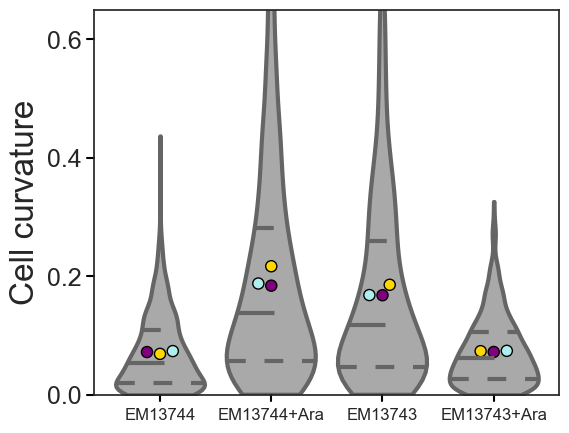

In [53]:
# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file2 = df2.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file3 = df3.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()

# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Add file labels to the original DataFrames
df1['File'] = 'File 1'
df2['File'] = 'File 2'
df3['File'] = 'File 3'
all_data = pd.concat([df1, df2, df3])

# Custom colors for mean data
custom_colors = {'File 1': '#ffd700', 'File 2': '#800080', 'File 3': '#afeeee'}
# Define the strains you want to include
included_strains = ['EM13744','EM13744+Ara', 'EM13743', 'EM13743+Ara']
custom_order=['EM13744','EM13744+Ara', 'EM13743', 'EM13743+Ara']

# set font size of axis labels
sns.set(style="white", font_scale=1.5)
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))


# Plot only the data for the included strains
sns.swarmplot(x='IMAGE', y='Curvature', data=mean_data[mean_data['IMAGE'].isin(included_strains)], hue='File', 
              dodge=False, zorder=2, size=8, palette=custom_colors, 
              edgecolor='black', linewidth=1, order=custom_order)

# 2. Violin plot for the individual data points of both DataFrames
sns.violinplot(x='IMAGE', y='Curvature', data=all_data[all_data['IMAGE'].isin(included_strains)], split=True, 
               inner = 'quartile', linewidth=3, color='darkgray',scale='width', 
               cut=False, width=0.8,order=custom_order)

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=16)

# Manually add y-tick lines
tick_length = 0.015  # adjust as needed
for y_tick in y_ticks:
    ax.plot([-tick_length, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())


plt.title('')
plt.xlabel('', fontsize=12)
plt.ylabel('Cell curvature', fontsize=24)
# set font size of tick labels
plt.xticks(fontsize=12)
plt.yticks(y_ticks,fontsize=18)

# Set the y-axis range
plt.ylim(0, 0.65)
plt.legend().remove()

# Display the plot
#plt.savefig('violin-araBAD.tiff',dpi=300, bbox_inches='tight')
plt.show()

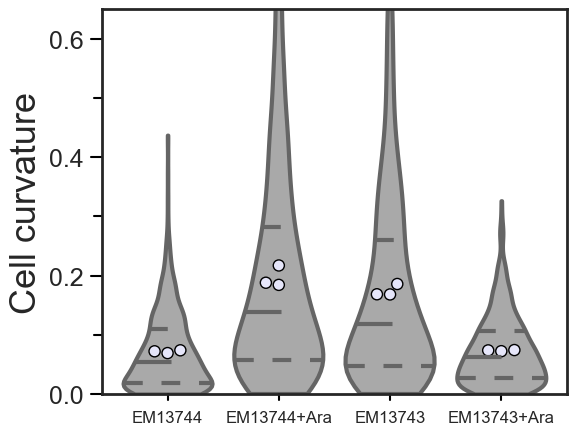

In [79]:
# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file2 = df2.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file3 = df3.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()

# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Add file labels to the original DataFrames
df1['File'] = 'File 1'
df2['File'] = 'File 2'
df3['File'] = 'File 3'
all_data = pd.concat([df1, df2, df3])

# Custom colors for mean data
custom_colors = {'File 1': '#e6e6fa', 'File 2': '#e6e6fa', 'File 3': '#e6e6fa'}
# Define the strains you want to include
included_strains = ['EM13744','EM13744+Ara', 'EM13743', 'EM13743+Ara']
custom_order=['EM13744','EM13744+Ara', 'EM13743', 'EM13743+Ara']

# set font size of axis labels
sns.set(style="white", font_scale=1.5)
# Create the figure and axes
fig, ax = plt.subplots(figsize=(6, 5))


# Plot only the data for the included strains
sns.swarmplot(x='IMAGE', y='Curvature', data=mean_data[mean_data['IMAGE'].isin(included_strains)], hue='File', 
              dodge=False, zorder=2, size=8, palette=custom_colors, 
              edgecolor='black', linewidth=1, order=custom_order)

# 2. Violin plot for the individual data points of both DataFrames
sns.violinplot(x='IMAGE', y='Curvature', data=all_data[all_data['IMAGE'].isin(included_strains)], split=True, 
               inner = 'quartile', linewidth=3, color='darkgray',scale='width', 
               cut=False, width=0.8,order=custom_order)

# Define and set y-ticks using the axes object
y_ticks = np.arange(0, 0.6 + 0.2, 0.2)  # Adjust the range as needed
y_tick_labels = [f"{y:.1f}" for y in y_ticks]  # Format to one decimal place
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels, fontsize=16)

# Add minor ticks on y-axis without labels
ax.yaxis.set_minor_locator(mticker.MultipleLocator(.1))

# Manually add major y-tick lines
tick_length_major = 0.0225  # Adjust as needed
major_tick_width = 2  # Adjust for desired major tick line width
for y_tick in y_ticks:
    ax.plot([-tick_length_major, 0], [y_tick, y_tick], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add minor y-tick lines
tick_length_minor = 0.0175  # Adjust as needed, typically smaller than major ticks
minor_y_ticks = np.arange(0, 0.65, 0.1)  # Assuming your y-axis ranges from 0 to 0.65
minor_tick_width = 2000  # Adjust for desired major tick line width
for y_tick_minor in minor_y_ticks:
    if y_tick_minor not in y_ticks:  # This check ensures that we don't overlap with major ticks
        ax.plot([-tick_length_minor, 0], [y_tick_minor, y_tick_minor], color='black', clip_on=False, transform=ax.get_yaxis_transform())

# Manually add x-tick lines
x_ticks = ax.get_xticks()  # Get the x-tick positions (assuming they are already set)
for x_tick in x_ticks:
    ax.plot([x_tick, x_tick], [-tick_length, 0], color='black', clip_on=False, transform=ax.get_xaxis_transform())


# Adjust tick lengths and widths for both minor and major ticks
ax.tick_params(axis='y', which='minor', length=5)
ax.tick_params(axis='y', which='major', length=10)
ax.tick_params(axis='x', which='major', length=8)    
        
plt.title('')
plt.xlabel('', fontsize=12)
plt.ylabel('Cell curvature', fontsize=26)
# set font size of tick labels
plt.xticks(fontsize=12)
plt.yticks(y_ticks,fontsize=18)

# Set the y-axis range
plt.ylim(0, 0.65)

# Increase the width of the axes and frame
for spine in plt.gca().spines.values():
    spine.set_linewidth(2)  # Adjust the width as needed

plt.legend().remove()

# Display the plot
plt.savefig('violin-araBAD_NoColour.tiff',dpi=300, bbox_inches='tight')
plt.show()

In [50]:
# Calculate the mean and standard deviation for each file separately
mean_file1 = df1.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file2 = df2.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()
mean_file3 = df3.groupby('IMAGE')[['SHAPE.area', 'Curvature']].mean()

# Calculate the combined mean and standard deviation between the two mean values
combined_mean = (mean_file1 + mean_file2 + mean_file3) / 3
std_dev = np.abs((mean_file1 - mean_file2) + (mean_file2 - mean_file3) + (mean_file3 - mean_file1)).std() / 3

# Create a DataFrame with the mean values and file labels
mean_file1['File'] = 'File 1'
mean_file2['File'] = 'File 2'
mean_file3['File'] = 'File 3'
mean_data = pd.concat([mean_file1.reset_index(), mean_file2.reset_index(), mean_file3.reset_index()])

# Add file labels to the original DataFrames
df1['File'] = 'File 1'
df2['File'] = 'File 2'
df3['File'] = 'File 3'
all_data = pd.concat([df1, df2, df3])

# Print the counts for each file
print("File 1:", df1.groupby('IMAGE')['Curvature'].count())
print("File 2:", df2.groupby('IMAGE')['Curvature'].count())
print("File 3:", df3.groupby('IMAGE')['Curvature'].count())

File 1: IMAGE
EM12322        369
EM12325        377
EM12440        436
EM13743        360
EM13743+Ara    379
EM13744        388
EM13744+Ara    320
EM9659         390
TH437          387
Name: Curvature, dtype: int64
File 2: IMAGE
EM12322        457
EM12325        365
EM12440        371
EM13743        333
EM13743+Ara    318
EM13744        379
EM13744+Ara    325
EM9659         340
TH437          409
Name: Curvature, dtype: int64
File 3: IMAGE
EM12322        451
EM12325        385
EM12440        362
EM13743        355
EM13743+Ara    396
EM13744        417
EM13744+Ara    334
EM9659         345
TH437          398
Name: Curvature, dtype: int64


In [15]:
file4 = 'P:/LAB/Manuel/2023/2023-03/Microscopy/20230329_Morphology/Excel-MicrobeJ/Morphology.csv'
# control with different DflgHI deletion to confirm not a fluke
df4 = read_csv_with_separators(file4, separators)
df4.columns = df4.columns.str.strip()
print(df4.tail())

        NAME            IMAGE  INTENSITY  POSITION  \
2799  b36215  EM14438_180.tif  6463.1930        10   
2800  b36244  EM14438_180.tif  6961.6875        10   
2801  b36248  EM14438_180.tif  6233.0933        10   
2802  b36253  EM14438_180.tif  6462.7114        10   
2803  b36321  EM14438_180.tif  6168.3390        10   

                                         PROFILE_MEDIAL  SHAPE  \
2799  ip[width=34  height=12  bits=16  min=4969.0  m...      1   
2800  ip[width=42  height=14  bits=16  min=4969.0  m...      1   
2801  ip[width=53  height=14  bits=16  min=4969.0  m...      1   
2802  ip[width=32  height=12  bits=16  min=4969.0  m...      1   
2803  ip[width=43  height=11  bits=16  min=4969.0  m...      1   

      SHAPE.angularity.mean  SHAPE.area  SHAPE.circularity  SHAPE.curvature  \
2799               0.102619    2.233643           0.651925         0.239289   
2800               0.196271    3.386422           0.609730         0.057831   
2801               0.499299    4.419720  

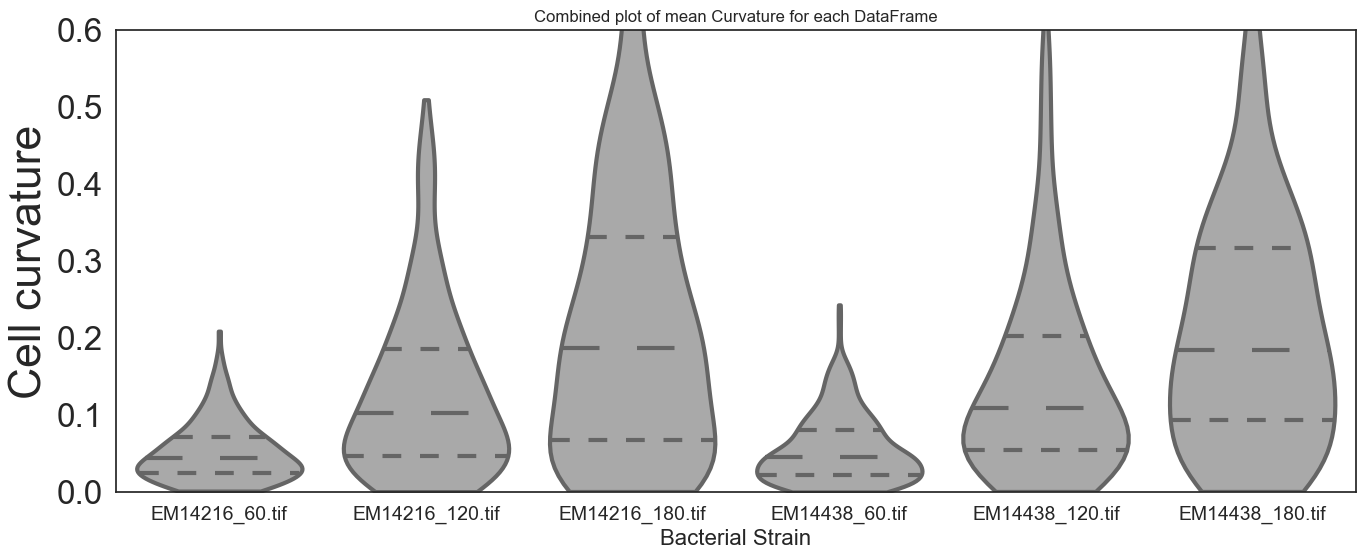

In [17]:
# Create a single figure
# Define the custom order of strains
custom_order = ['EM14216_60.tif', 'EM14216_120.tif', 'EM14216_180.tif', 'EM14438_60.tif','EM14438_120.tif','EM14438_180.tif']

#EM14216	DflgHI958 PflhDC5451::Tn10dTc[del-25] DflhE23076::FCF
#EM14438	DflhE7404 PflhDC5451::Tn10dTc[del-25] DflgHI23618::FKF

# set font size of axis labels
sns.set(font_scale=1.5)
sns.set(style= "white" )
plt.figure(figsize=(16, 6))

# set font size of tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=24)


# 1. Swarm plot showing the mean of each DataFrame
#sns.swarmplot(x='IMAGE', y='SHAPE.curvature', data=df4, dodge=False, 
 #            zorder=2, order=custom_order, size = 5, palette=sns.color_palette("colorblind"))

# 2. Violin plot for the individual data points of both DataFrames
#sns.violinplot(x='IMAGE', y='SHAPE.curvature', data=df4, inner = 'quartile', 
 #              linewidth=3, color='darkgray',scale='width', cut=False, width=0.7, order=custom_order)
sns.violinplot(x='IMAGE', y='SHAPE.curvature', data=df4, split=True, inner = 'quartile', 
               linewidth=3, color='darkgray',scale='width', cut=False, width=0.8, order=custom_order)
#sns.stripplot(x='IMAGE', y='SHAPE.curvature', data=df4, split=False, s=1, marker="D", linewidth=2, alpha=.2, color='lightgray', zorder=1, order=custom_order)

# 3. Box plot instead of the histogram
#sns.boxplot(x='IMAGE', y='Curvature', data=mean_data, hue='File', width=0.2, zorder=1, order=custom_order)


# Set the title and labels
plt.title('Combined plot of mean Curvature for each DataFrame')
plt.xlabel('Bacterial Strain', fontsize=16)
plt.ylabel('Cell curvature', fontsize=32)

# Set the x-axis tick labels
#plt.xticks(bar_positions, custom_order)

# Set the y-axis range
plt.ylim(0, 0.6)
#plt.legend().remove()

# Display the plot
#plt.savefig('saving-a-seaborn-plot-as-eps-file.tiff',
 #          dpi=300)
plt.show()